In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [37]:
data = pd.read_csv('bank.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [38]:
# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

Dataset Preview:
   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [40]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

In [41]:
data['age'] = encoder.fit_transform(data[['age']])
data['job'] = encoder.fit_transform(data[['job']])
data['marital'] = encoder.fit_transform(data[['marital']])
data['education'] = encoder.fit_transform(data[['education']])
data['default'] = encoder.fit_transform(data[['default']])
data['balance'] = encoder.fit_transform(data[['balance']])
data['housing'] = encoder.fit_transform(data[['housing']])
data['loan'] = encoder.fit_transform(data[['loan']])
data['contact'] = encoder.fit_transform(data[['contact']])
data['day'] = encoder.fit_transform(data[['day']])
data['month'] = encoder.fit_transform(data[['month']])
data['duration'] = encoder.fit_transform(data[['duration']])
data['campaign'] = encoder.fit_transform(data[['campaign']])
data['pdays'] = encoder.fit_transform(data[['pdays']])
data['previous'] = encoder.fit_transform(data[['previous']])
data['poutcome'] = encoder.fit_transform(data[['poutcome']])
data['deposit'] = encoder.fit_transform(data[['deposit']])


In [42]:
# 1. Check for missing values
print("\nMissing Values Summary:")
print(data.isnull().sum())


Missing Values Summary:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [43]:
# 3. Summary statistics of the dataset
print("\nSummary Statistics:")
print(data.describe())



Summary Statistics:
                age           job       marital     education       default  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      23.231410      4.487905      1.199337      1.285164      0.015051   
std       11.911048      3.225132      0.625552      0.749478      0.121761   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       14.000000      1.000000      1.000000      1.000000      0.000000   
50%       21.000000      4.000000      1.000000      1.000000      0.000000   
75%       31.000000      7.000000      2.000000      2.000000      0.000000   
max       75.000000     11.000000      2.000000      3.000000      1.000000   

            balance       housing          loan       contact           day  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean    1327.318043      0.473123      0.130801      0.489697     14.658036   
std      965.056807      0.499

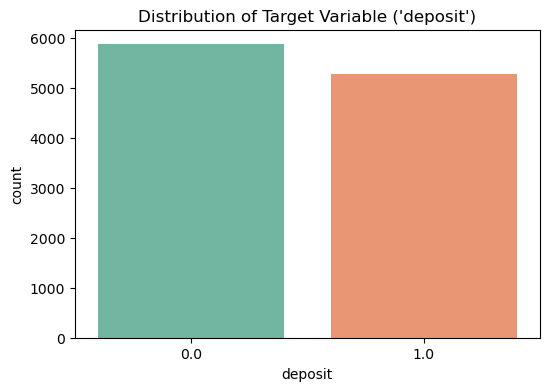

In [44]:
# Univariate Analysis - Distribution of Target Variable
plt.figure(figsize=(6,4))
sns.countplot(x='deposit', data=data, palette='Set2')
plt.title("Distribution of Target Variable ('deposit')")
plt.show()

In [45]:
# Checking for class imbalance
print("\nTarget Variable Distribution:")
print(data['deposit'].value_counts(normalize=True))


Target Variable Distribution:
deposit
0.0    0.52616
1.0    0.47384
Name: proportion, dtype: float64


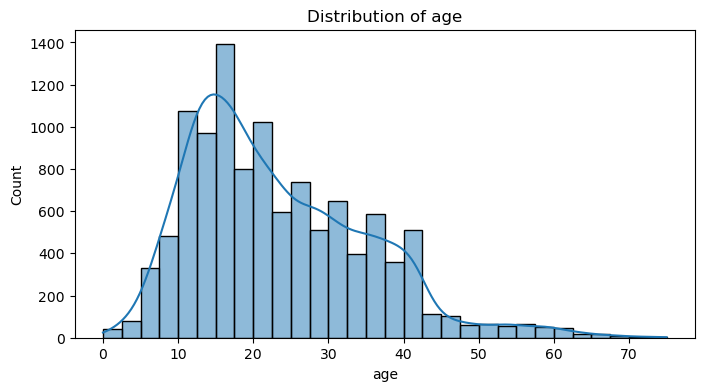

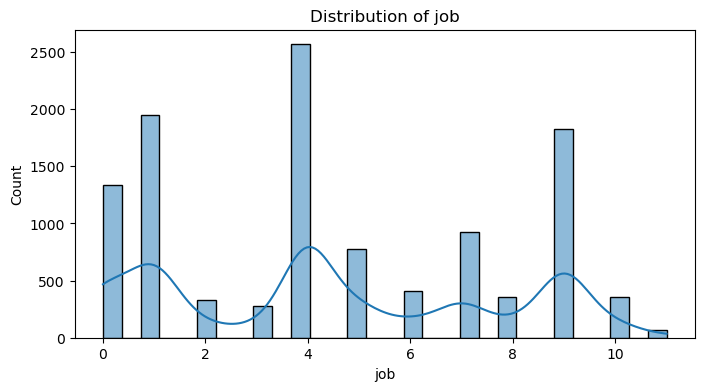

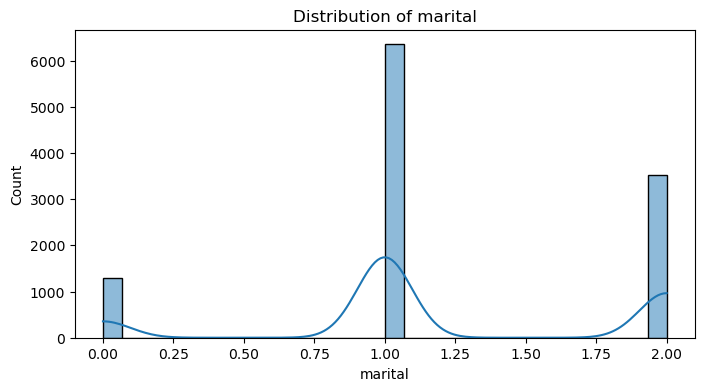

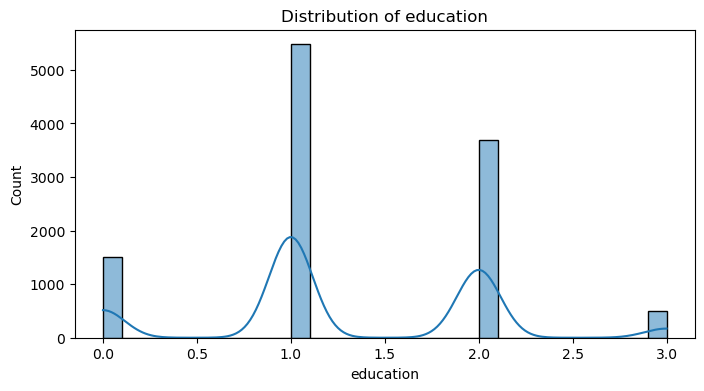

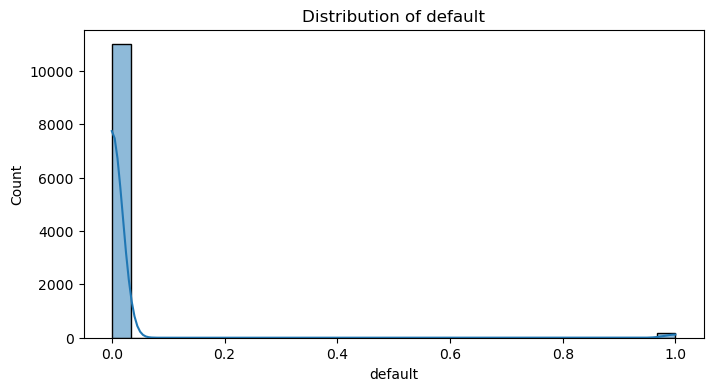

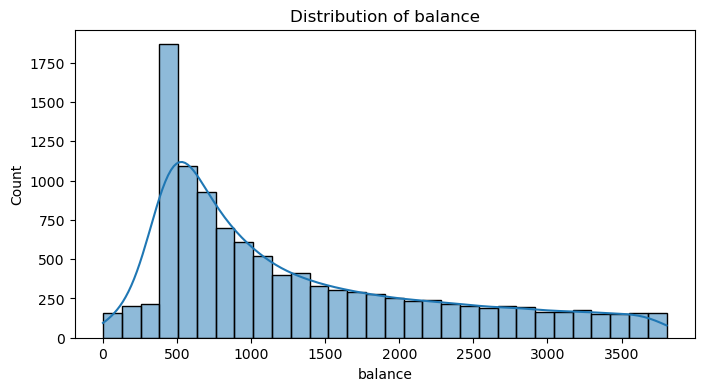

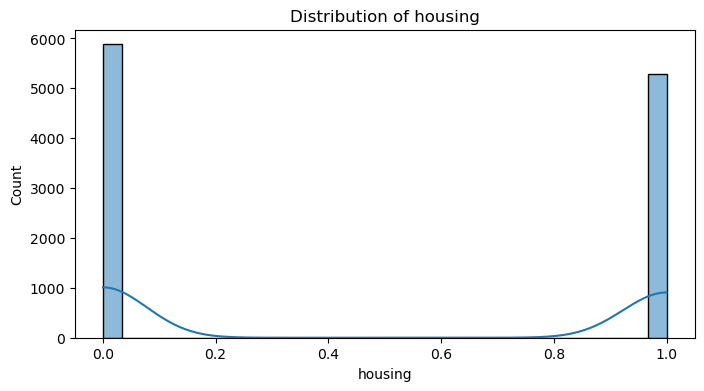

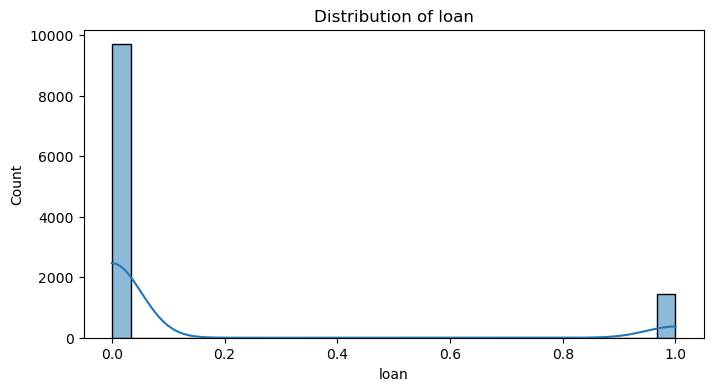

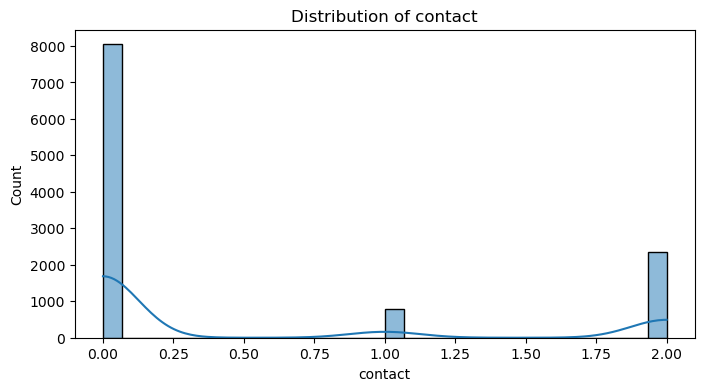

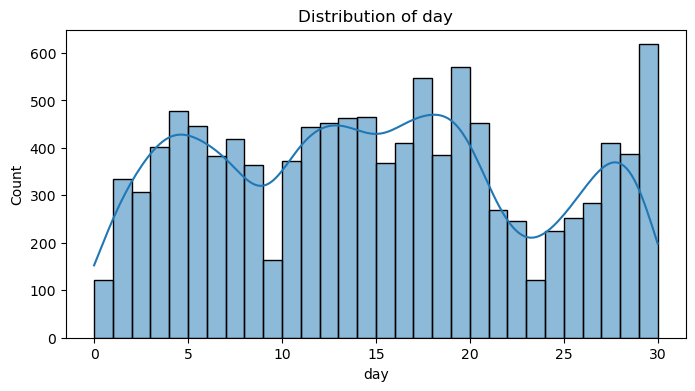

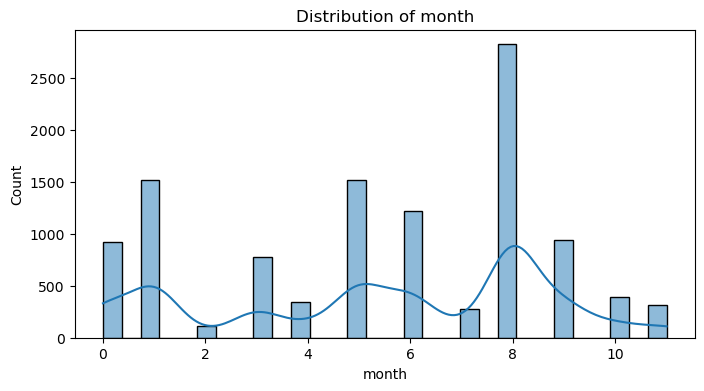

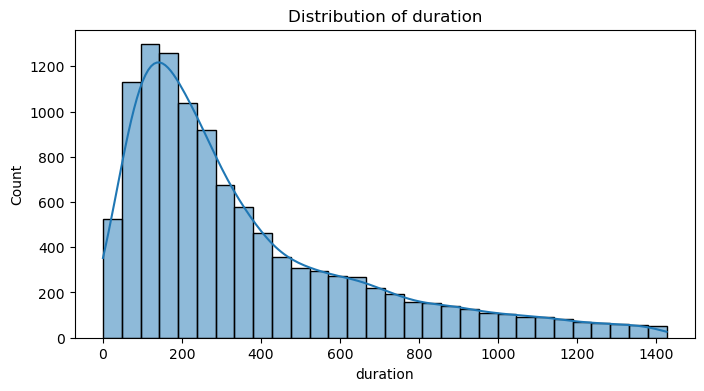

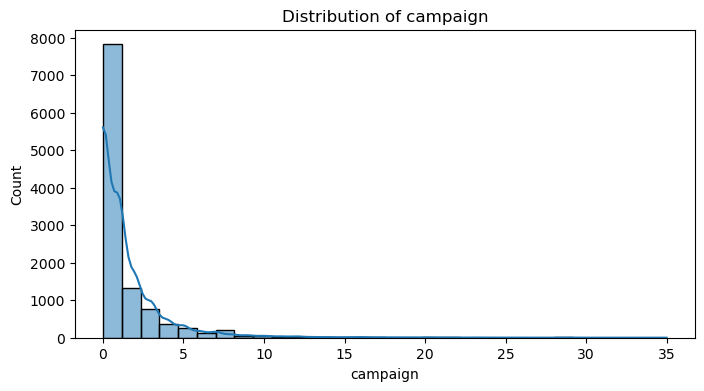

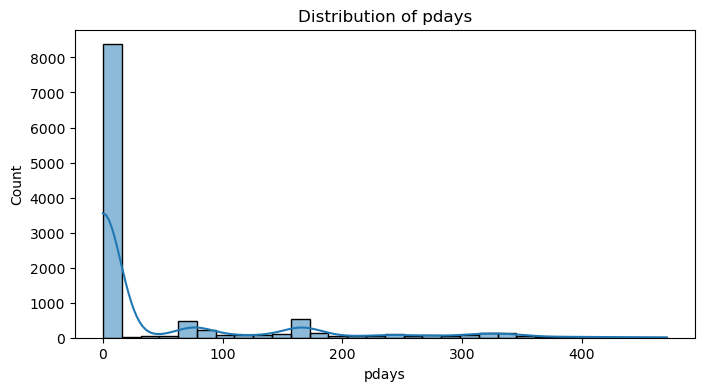

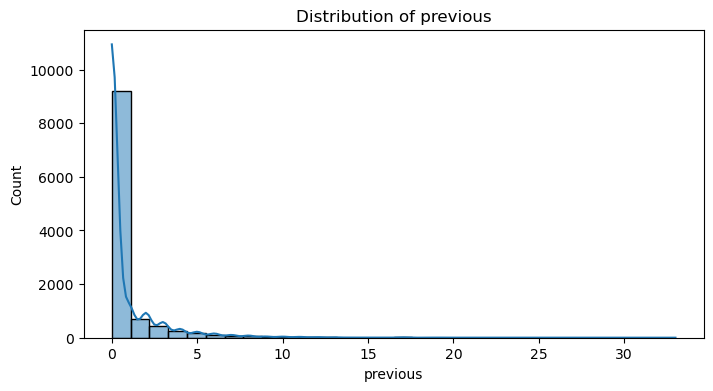

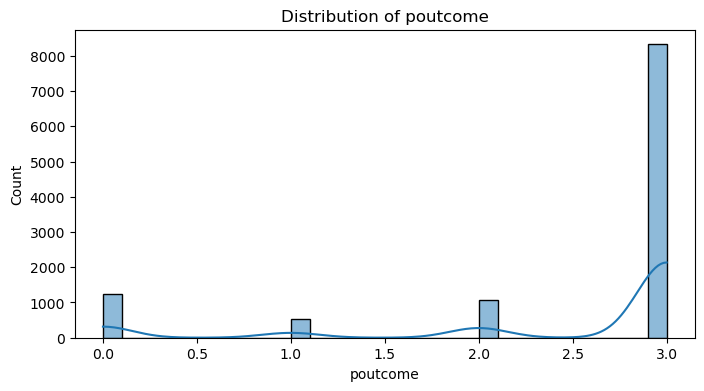

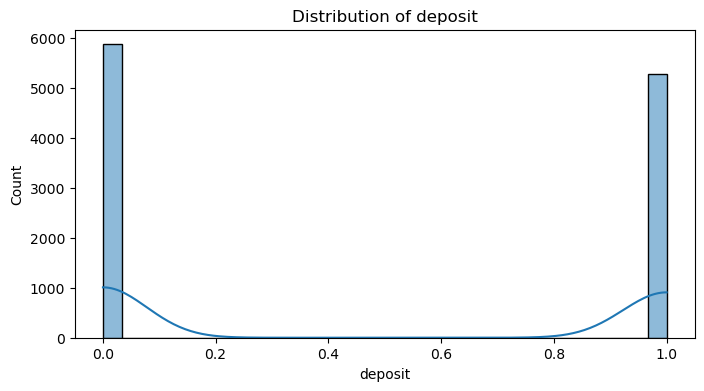

In [46]:
# Univariate Analysis - Numerical Variables
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

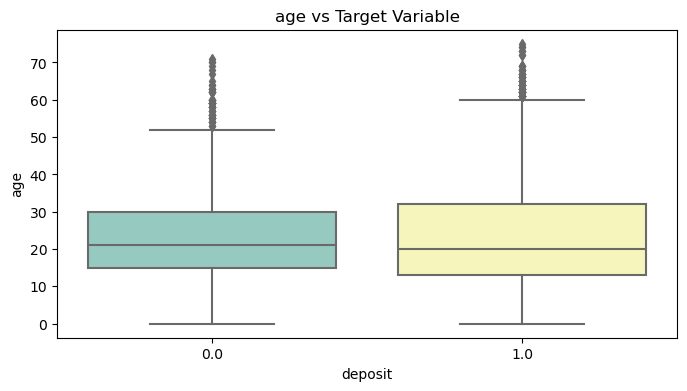

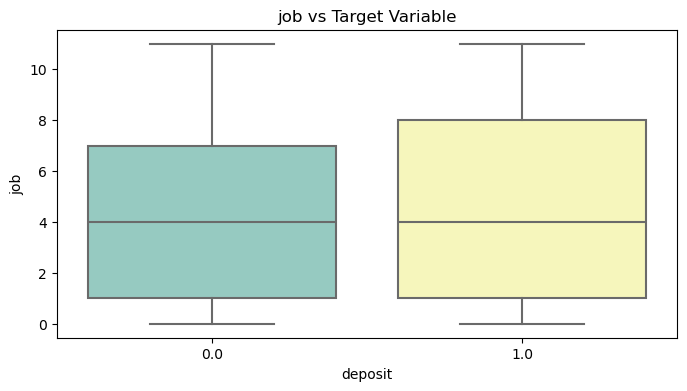

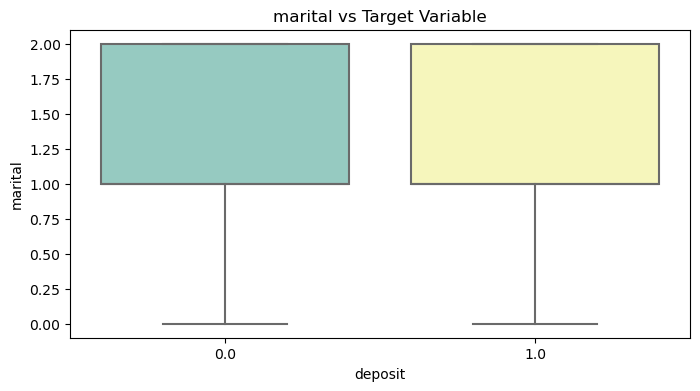

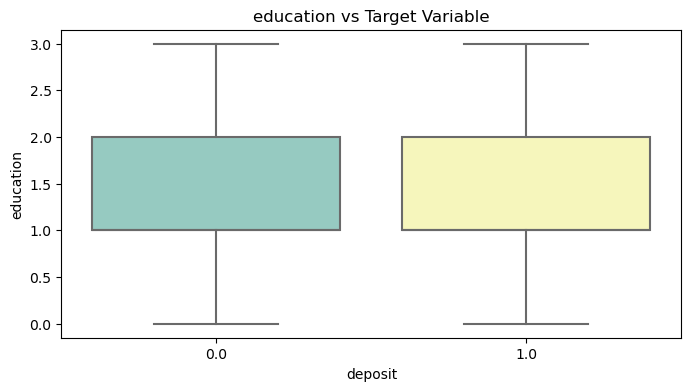

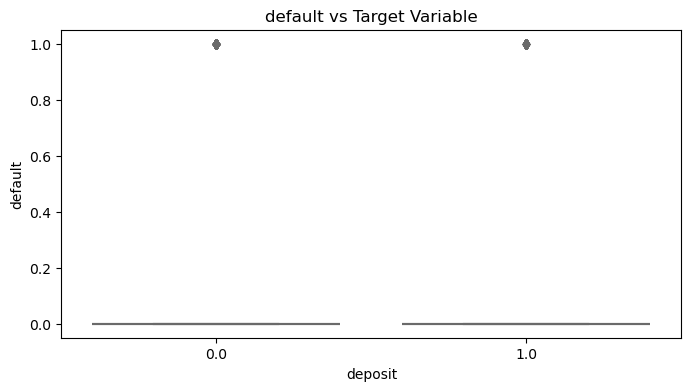

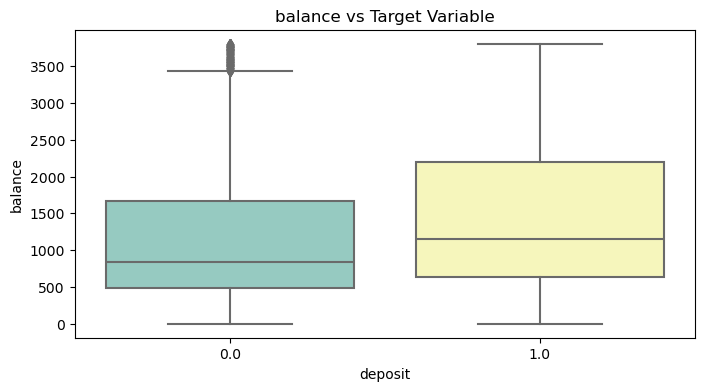

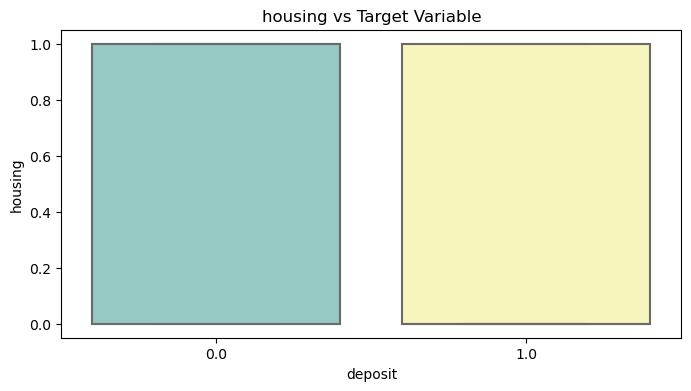

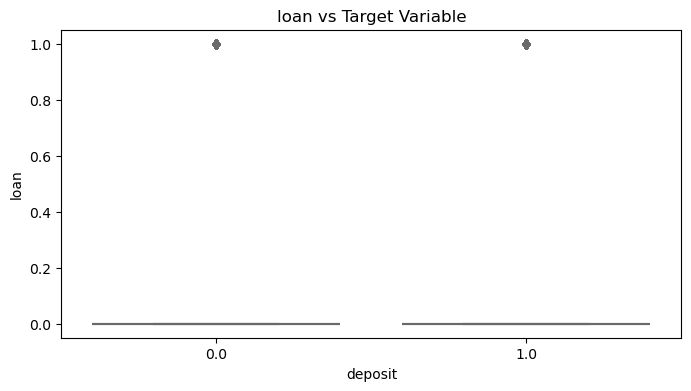

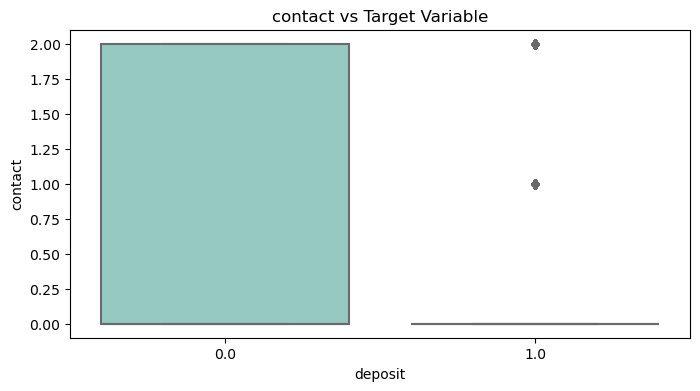

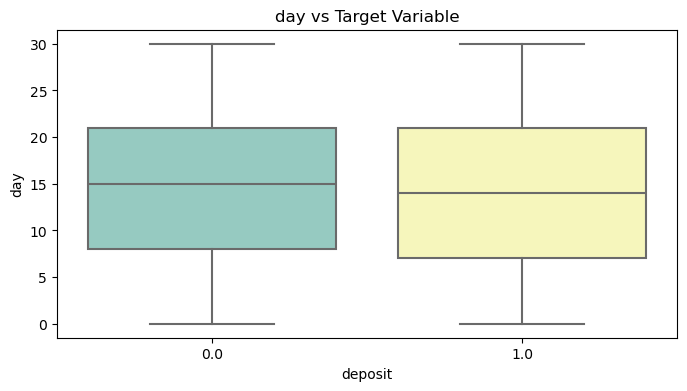

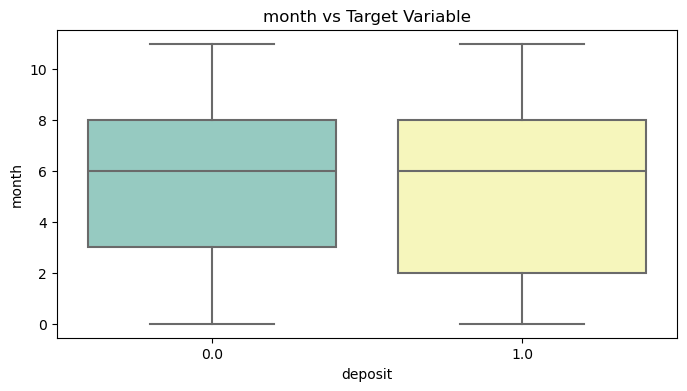

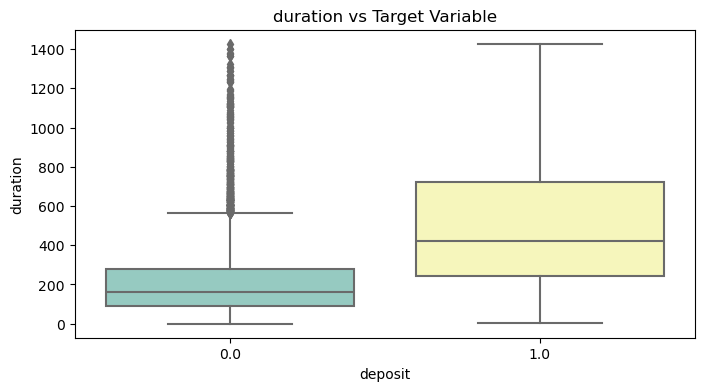

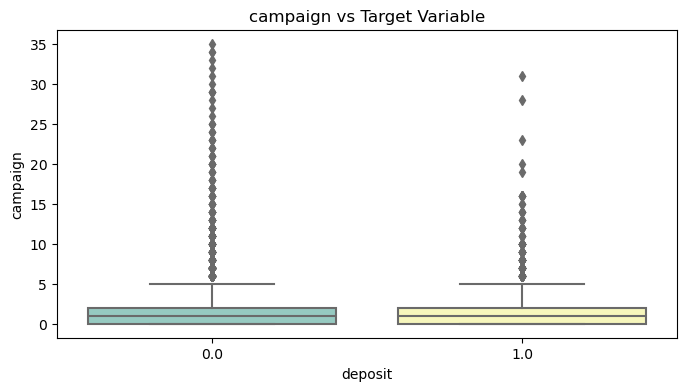

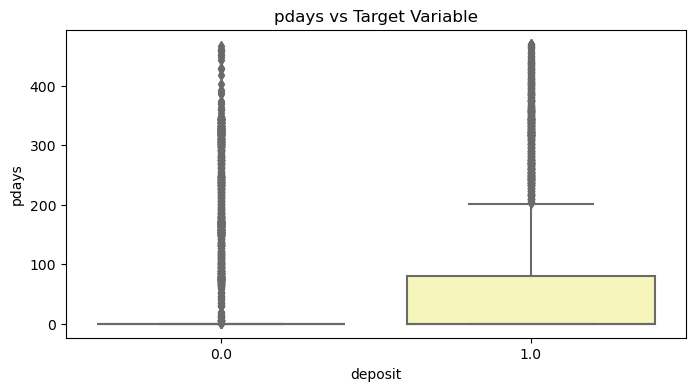

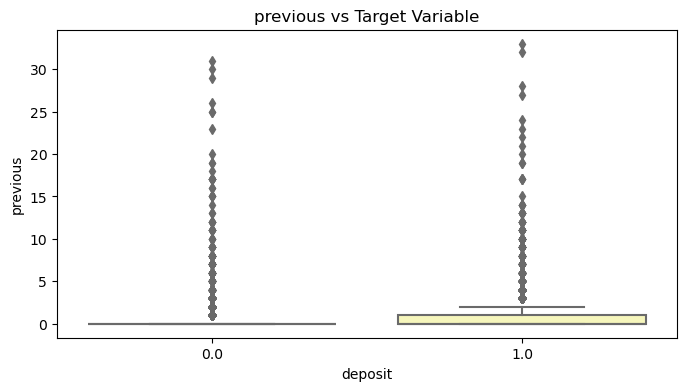

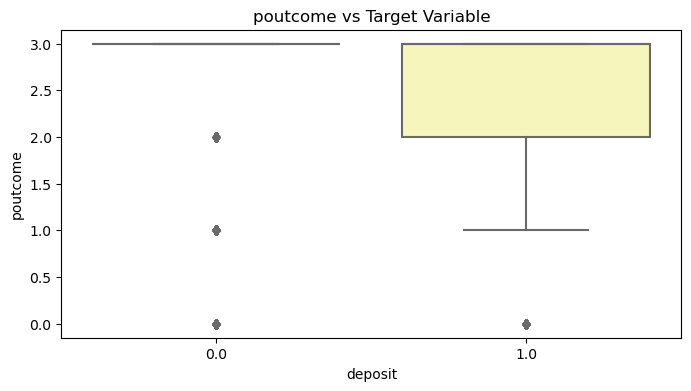

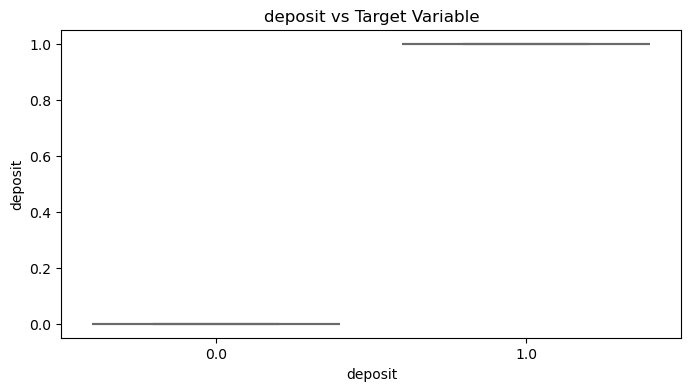

In [47]:
# Bivariate Analysis - Numerical vs Target
for col in numerical_columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='deposit', y=col, data=data, palette='Set3')
    plt.title(f"{col} vs Target Variable")
    plt.show()

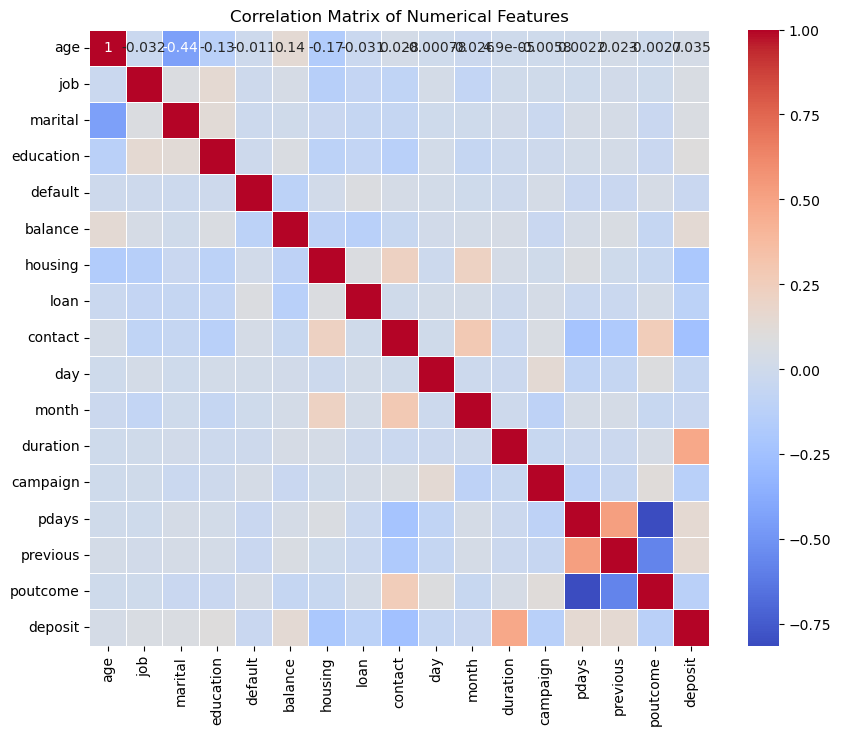

In [48]:
# Multivariate Analysis - Correlation Matrix
plt.figure(figsize=(10,8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [49]:
# Identify features (excluding the target 'deposit')
X = data.drop('deposit', axis=1)
y = data['deposit']

In [50]:
# Convert categorical columns to numerical using Label Encoding
categorical_columns = X.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

In [51]:
# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7630989699955217
Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.78      0.78      1166
         1.0       0.76      0.74      0.75      1067

    accuracy                           0.76      2233
   macro avg       0.76      0.76      0.76      2233
weighted avg       0.76      0.76      0.76      2233

